时间特征：
信号平均值: 0.00011262302857591019
信号标准差: 0.07850239492517971


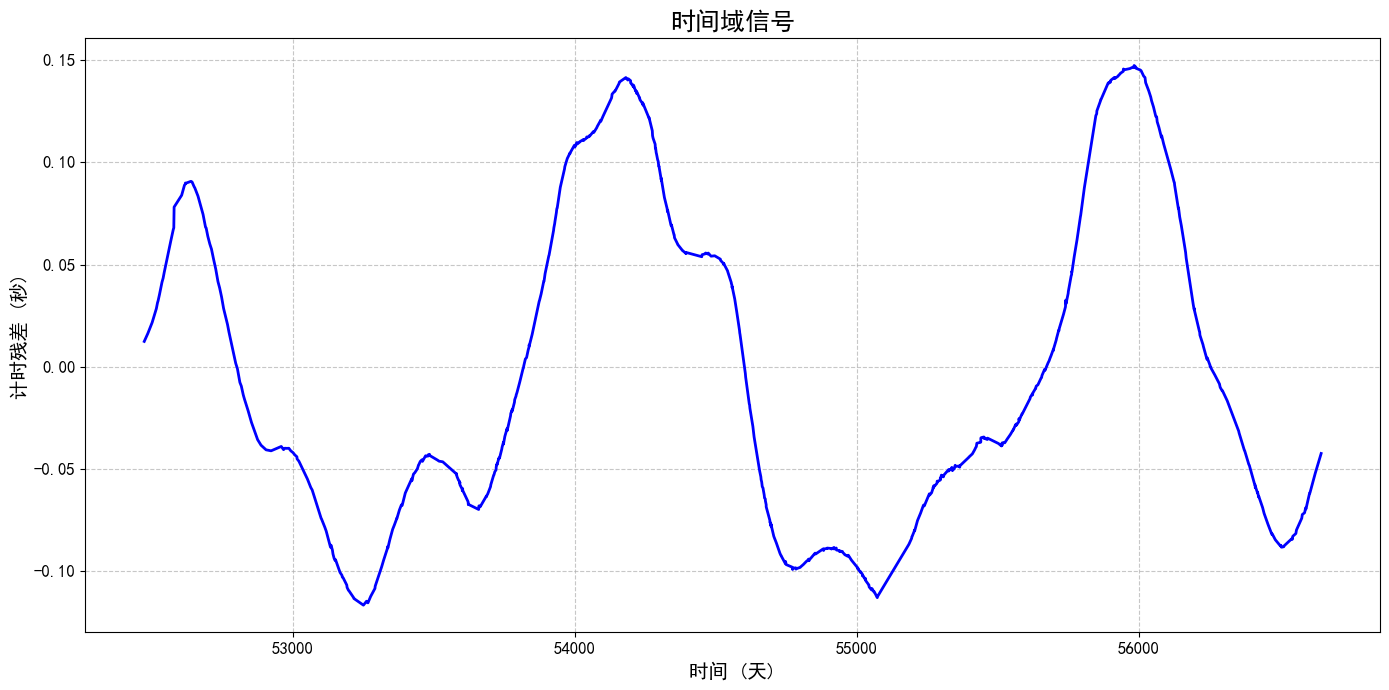

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

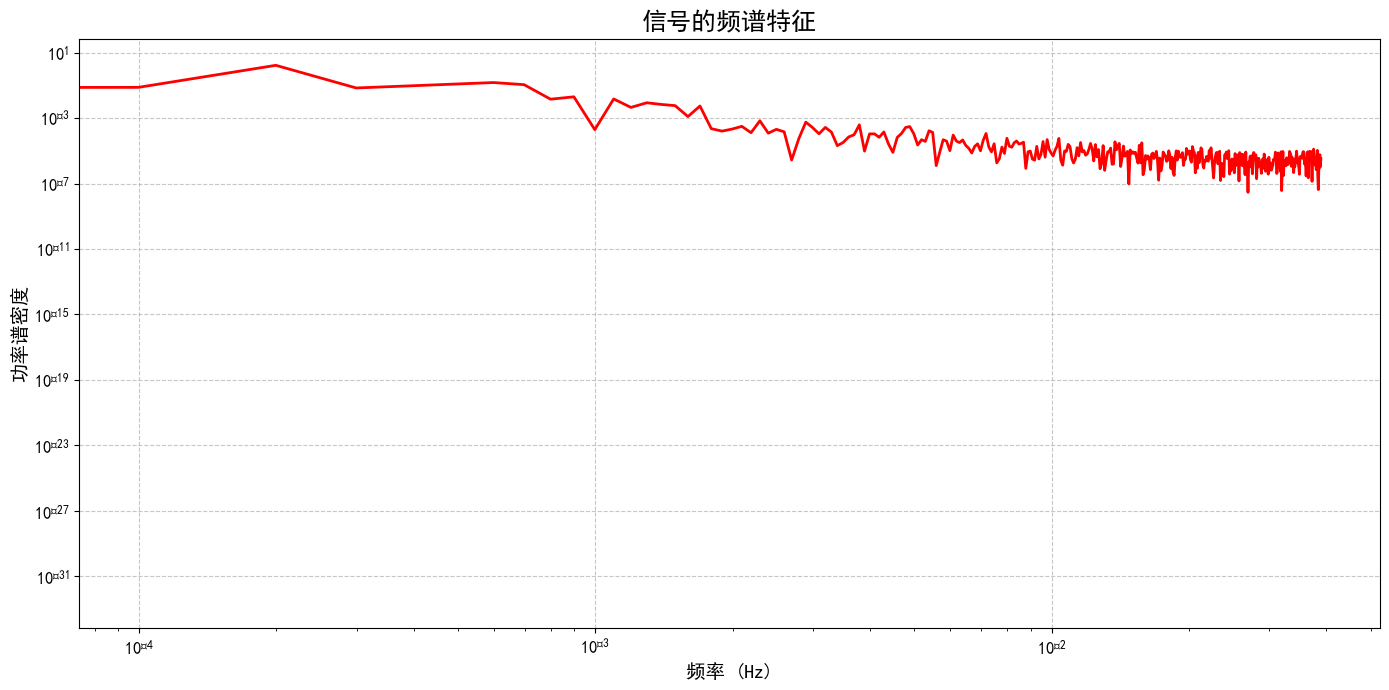

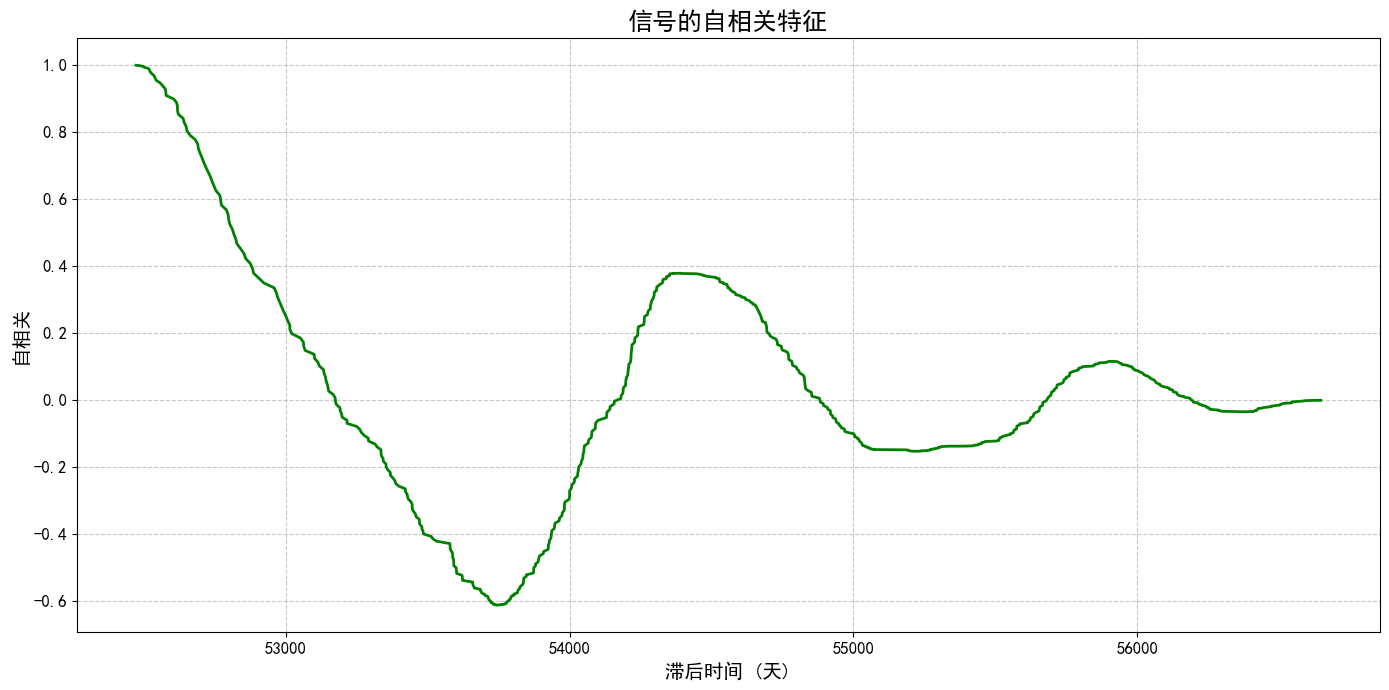

红噪声特征：
低频区域（< 0.0001 Hz）功率占总功率的比例: 0.0316
信号中的红噪声成分不显著。


In [2]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import correlate
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

# 设置 matplotlib 使用支持中文和负号的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 允许负号正常显示

# 读取Excel文件
file_path = 'Attachment 1.xlsx'
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])

# 提取时间和信号列
time = pd.to_numeric(df['MJD(days)'], errors='coerce').dropna()
signal = pd.to_numeric(df['PT-TT(s)'], errors='coerce').dropna()

# 1. 时间特征分析
mean_signal = np.mean(signal)
std_signal = np.std(signal)
print("时间特征：")
print(f"信号平均值: {mean_signal}")
print(f"信号标准差: {std_signal}")

# 绘制时间域信号
plt.figure(figsize=(14, 7))
sns.lineplot(x=time, y=signal, color='blue', linewidth=2)
plt.xlabel('时间 (天)', fontsize=14)
plt.ylabel('计时残差 (秒)', fontsize=14)
plt.title('时间域信号', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 2. 频域特征分析
N = len(signal)
sampling_rate = 1 / (time.iloc[1] - time.iloc[0])  # 假设时间间隔均匀
fft_values = fft(np.asarray(signal) - mean_signal)
frequencies = fftfreq(N, d=1/sampling_rate)
psd = (np.abs(fft_values) ** 2) / N

# 绘制频谱图
plt.figure(figsize=(14, 7))
sns.lineplot(x=frequencies[:N // 2], y=psd[:N // 2], color='red', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('频率 (Hz)', fontsize=14)
plt.ylabel('功率谱密度', fontsize=14)
plt.title('信号的频谱特征', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 3. 自相关特征分析
autocorr = correlate(np.asarray(signal) - mean_signal, np.asarray(signal) - mean_signal, mode='full')
autocorr = autocorr[autocorr.size // 2:] / np.max(autocorr)  # 归一化并取正半部分

# 绘制自相关函数
plt.figure(figsize=(14, 7))
sns.lineplot(x=time[:len(autocorr)], y=autocorr, color='green', linewidth=2)
plt.xlabel('滞后时间 (天)', fontsize=14)
plt.ylabel('自相关', fontsize=14)
plt.title('信号的自相关特征', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 4. 红噪声特征分析
# 低频区域特征，常见红噪声在低频区域会有较高功率密度
low_freq_threshold = 1e-4  # 可以根据实际数据情况调整
low_freq_indices = frequencies[:N // 2] < low_freq_threshold
low_freq_power = np.sum(psd[:N // 2][low_freq_indices])
total_power = np.sum(psd[:N // 2])
red_noise_ratio = low_freq_power / total_power

print("红噪声特征：")
print(f"低频区域（< {low_freq_threshold} Hz）功率占总功率的比例: {red_noise_ratio:.4f}")

if red_noise_ratio > 0.5:
    print("信号中可能存在显著的红噪声成分。")
else:
    print("信号中的红噪声成分不显著。")


时间特征：
信号平均值: 0.00011262302857591019
信号标准差: 0.07850239492517971
信号中位数: -0.0231507316263984

KPSS 检验结果：
KPSS 统计量: 0.2465463276614464
p 值: 0.1
临界值:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

ADF 检验结果：
ADF 统计量: -2.9305633203874293
p 值: 0.04190759208127045
临界值:
   1%: -3.4388159246521433
   5%: -2.865276554696385
   10%: -2.5687597090530696

数据平稳，无需进行差分变换。


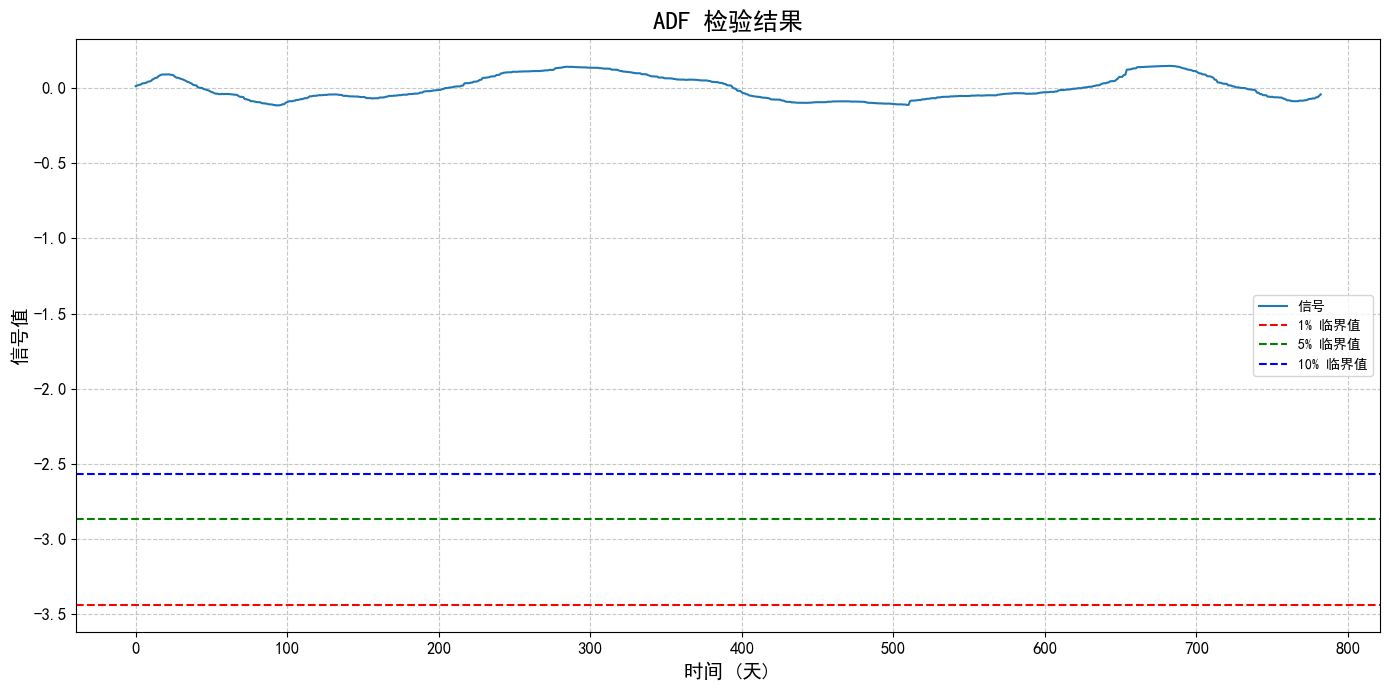

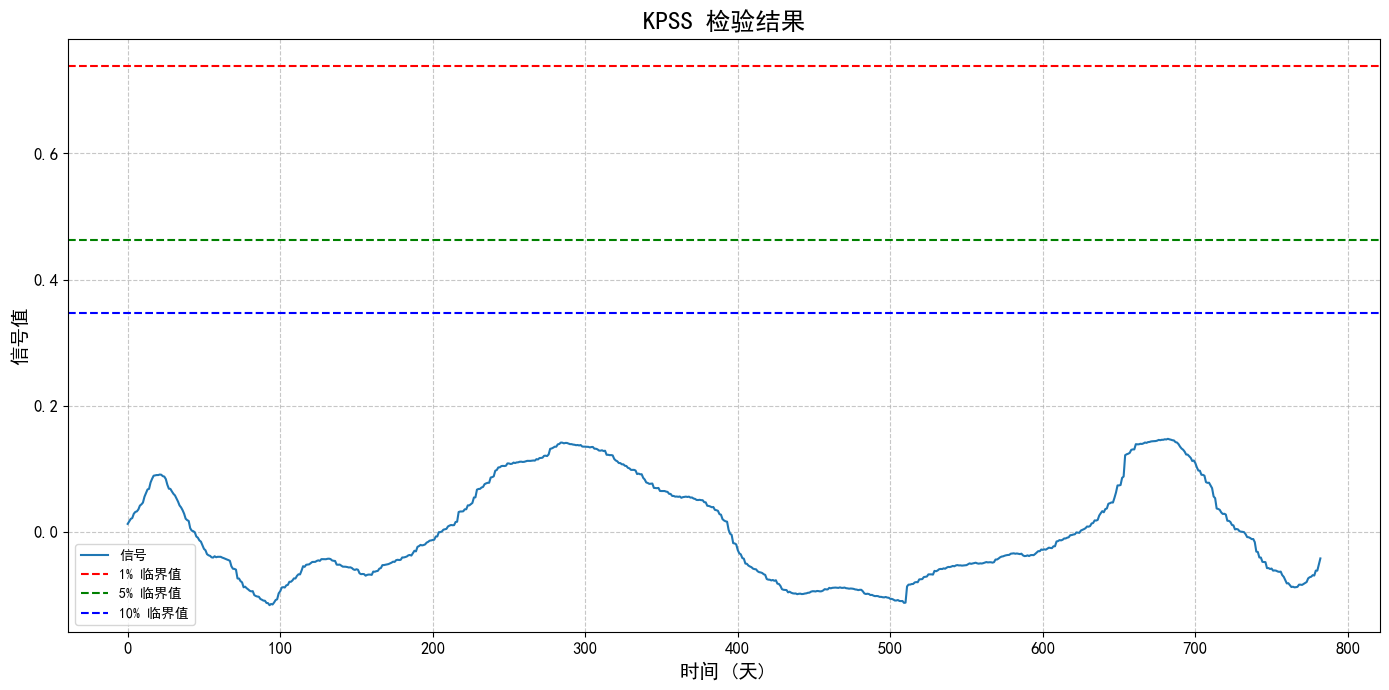

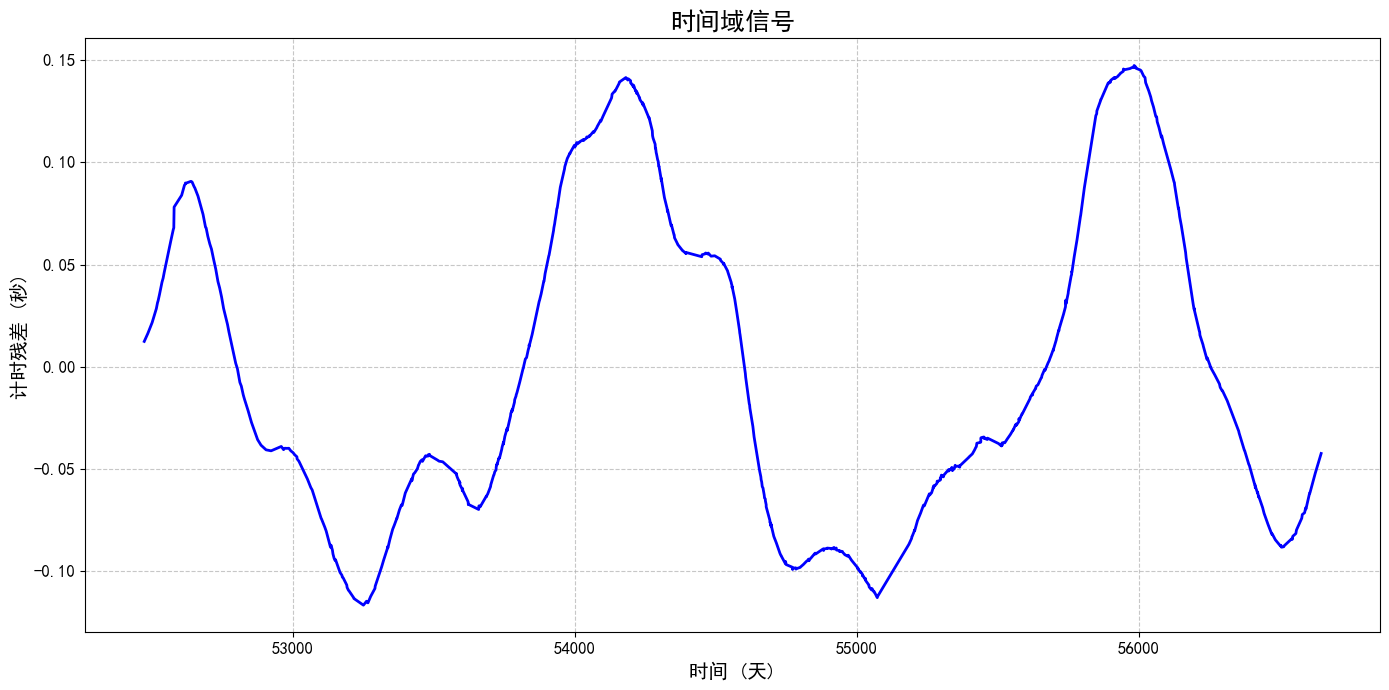

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

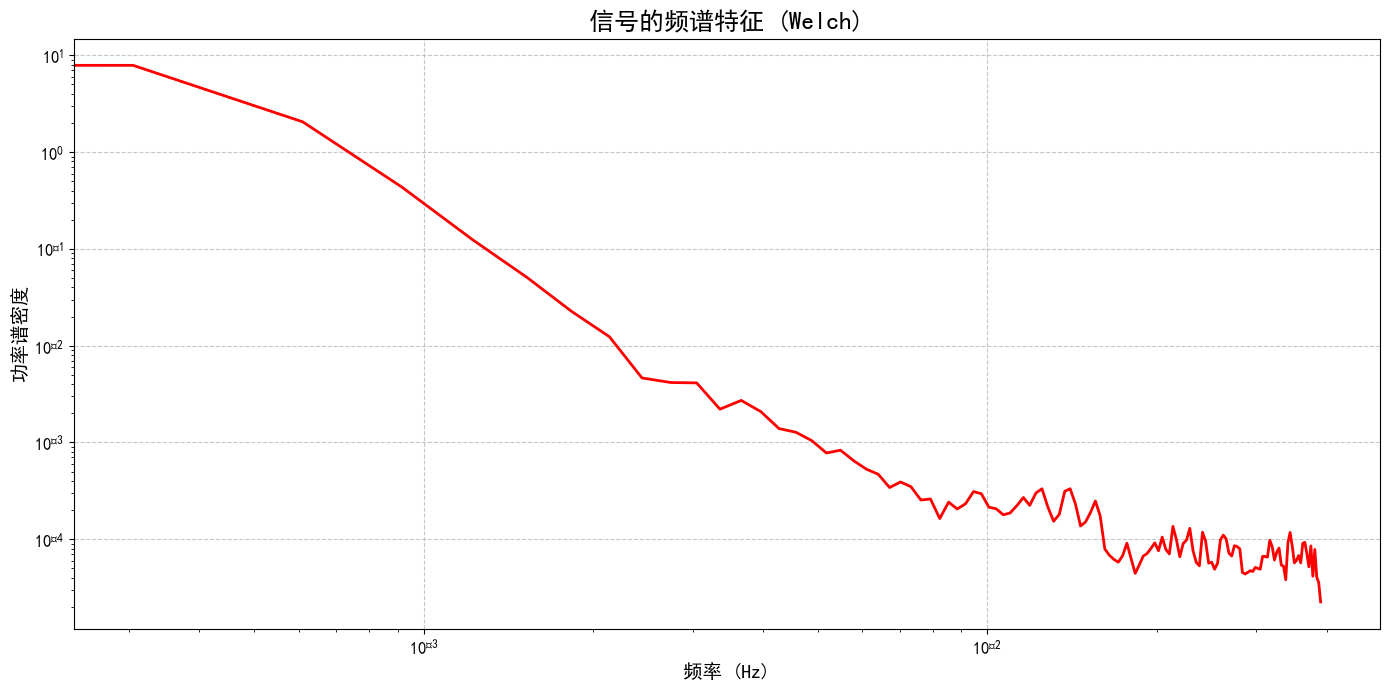

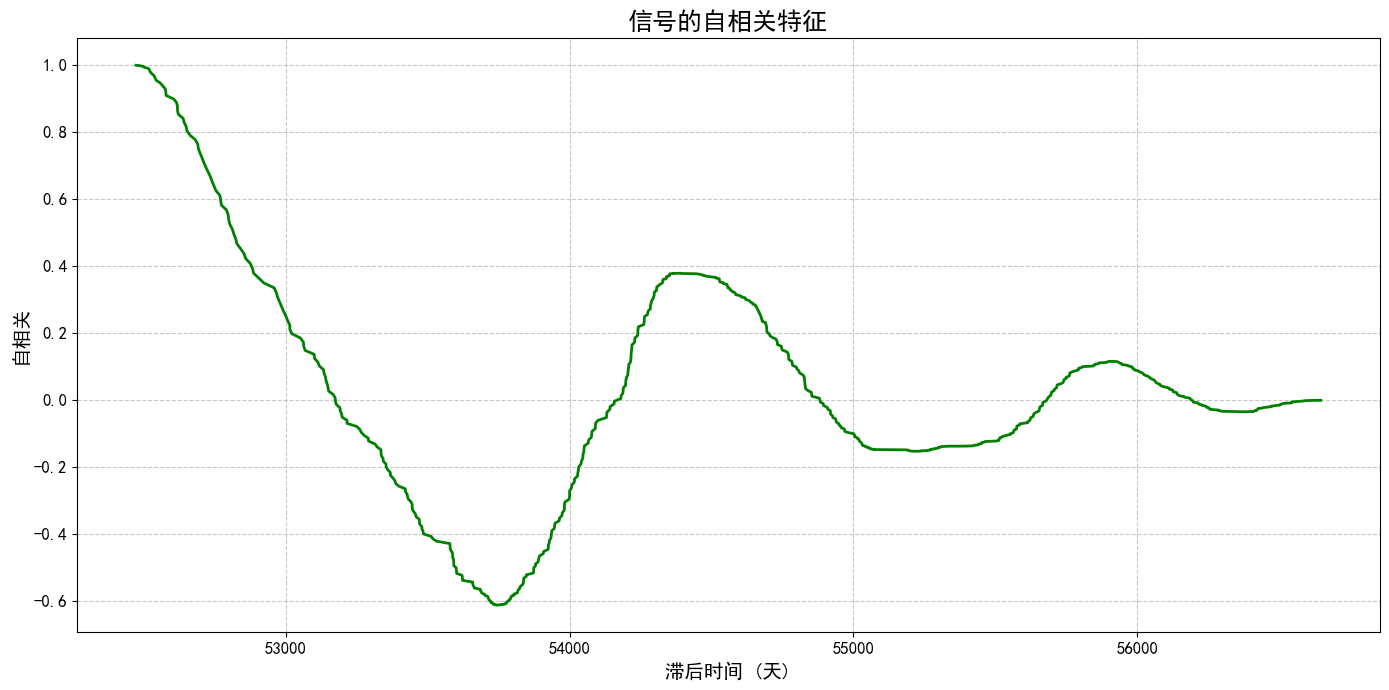

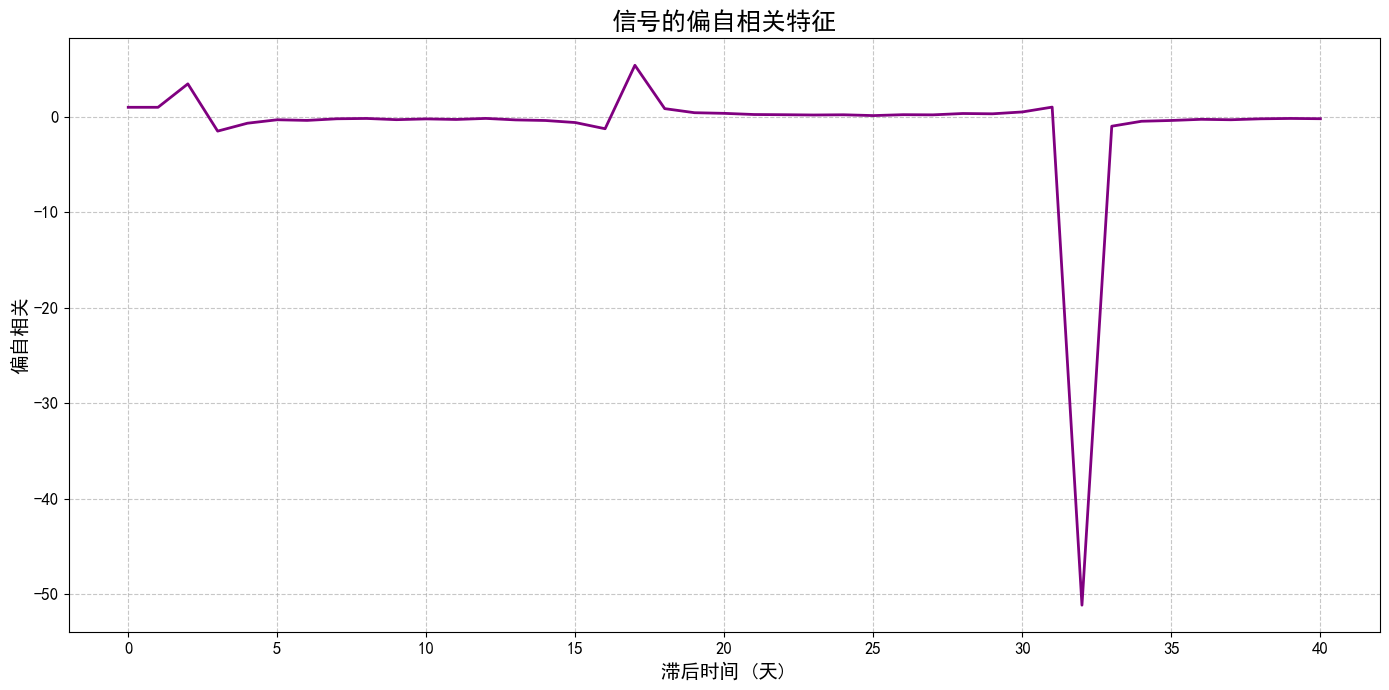

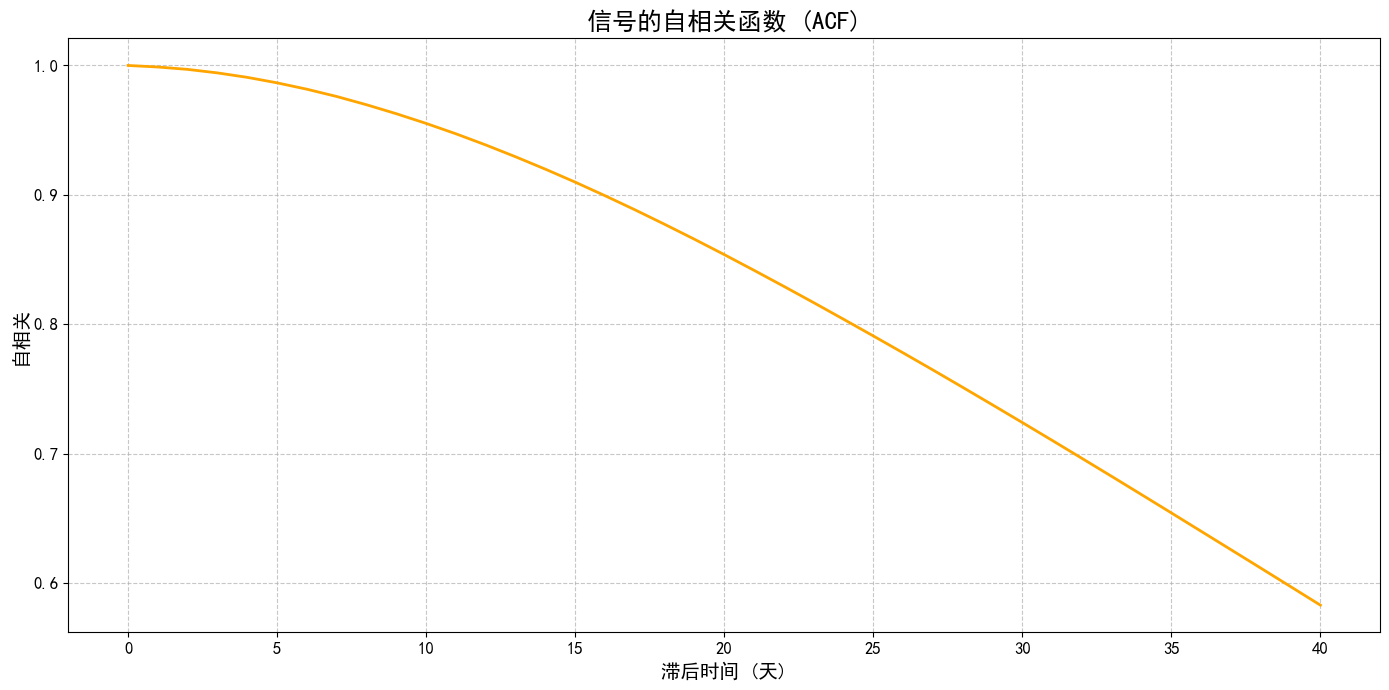

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.



红噪声特征分析：
频率 < 1e-06 Hz 的功率占比: 0.1356
频率 < 1e-05 Hz 的功率占比: 0.1356
频率 < 0.0001 Hz 的功率占比: 0.1356
频率 < 0.001 Hz 的功率占比: 0.9796

功率谱密度斜率: -2.04
拟合截距: -7.45
拟合优度 R^2: 0.8819
根据功率谱密度斜率，信号表现出明显的红噪声特征


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


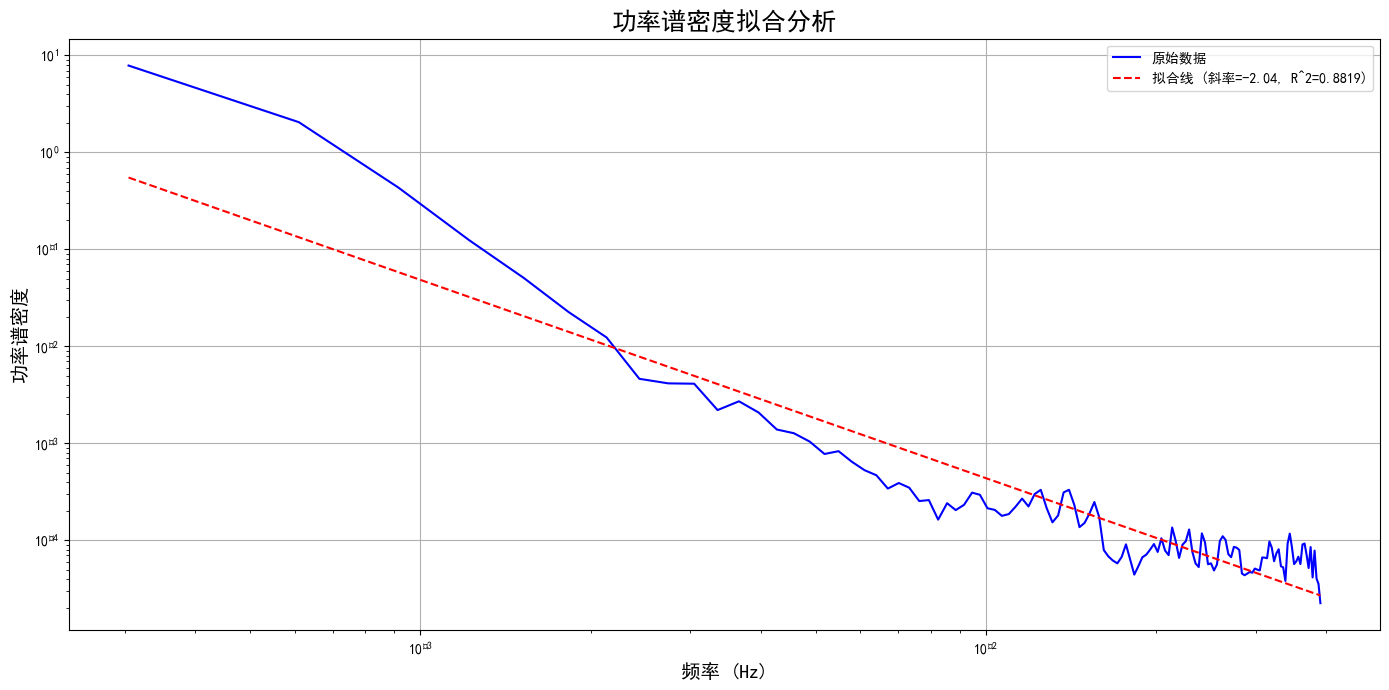

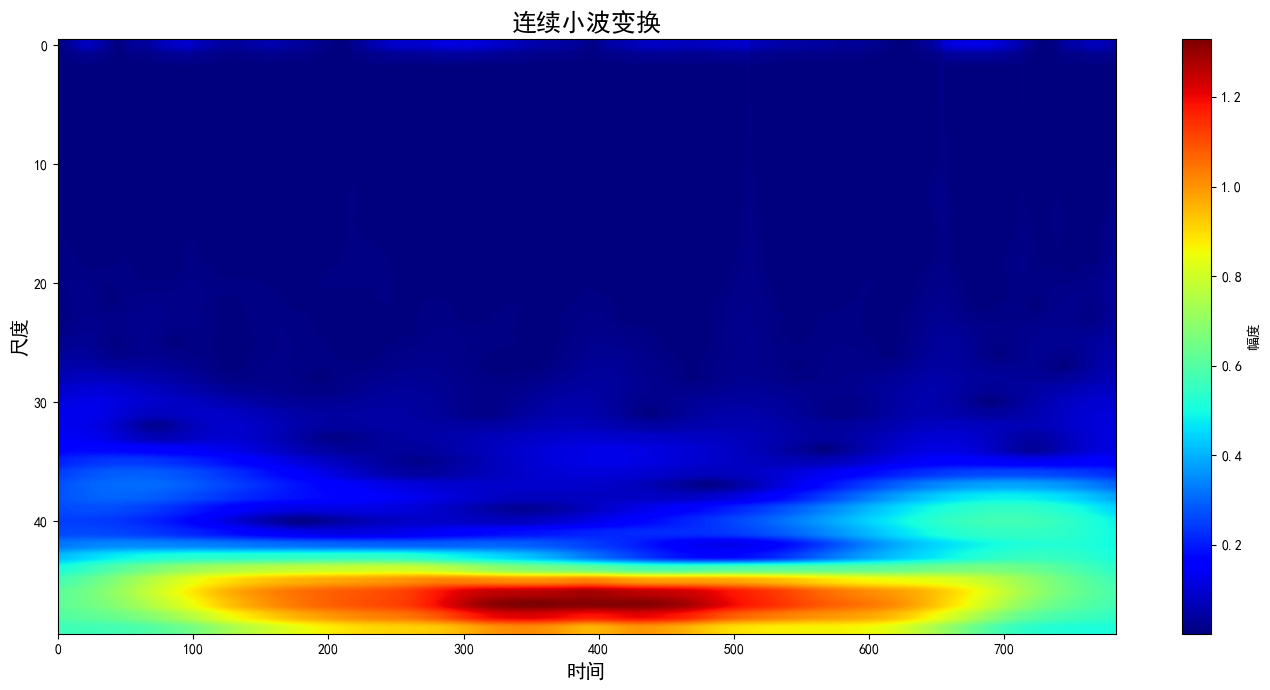

In [1]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import correlate, welch
from statsmodels.tsa.stattools import pacf, kpss, adfuller, acf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

# 设置 matplotlib 使用支持中文和负号的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 允许负号正常显示

# 读取Excel文件
file_path = 'Attachment 1.xlsx'
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])

# 提取时间和信号列
time = pd.to_numeric(df['MJD(days)'], errors='coerce').dropna()
signal_data = pd.to_numeric(df['PT-TT(s)'], errors='coerce').dropna()  # 改名为 signal_data

# 1. 时间特征分析
mean_signal = np.mean(signal_data)
std_signal = np.std(signal_data)
median_signal = np.median(signal_data)
print("时间特征：")
print(f"信号平均值: {mean_signal}")
print(f"信号标准差: {std_signal}")
print(f"信号中位数: {median_signal}")

# 平稳性检验
kpss_result = kpss(signal_data)
adf_result = adfuller(signal_data)

print("\nKPSS 检验结果：")
print(f"KPSS 统计量: {kpss_result[0]}")
print(f"p 值: {kpss_result[1]}")
print("临界值:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")

print("\nADF 检验结果：")
print(f"ADF 统计量: {adf_result[0]}")
print(f"p 值: {adf_result[1]}")
print("临界值:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# 判断是否需要进行差分变换
if kpss_result[1] < 0.05 or adf_result[1] > 0.05:
    print("\n数据非平稳，建议进行差分变换。")
else:
    print("\n数据平稳，无需进行差分变换。")

#adf 检验结果可视化
plt.figure(figsize=(14, 7))
plt.plot(signal_data, label='信号')
plt.axhline(y=adf_result[4]['1%'], color='r', linestyle='--', label='1% 临界值')
plt.axhline(y=adf_result[4]['5%'], color='g', linestyle='--', label='5% 临界值')
plt.axhline(y=adf_result[4]['10%'], color='b', linestyle='--', label='10% 临界值')
plt.xlabel('时间 (天)', fontsize=14)
plt.ylabel('信号值', fontsize=14)
plt.title('ADF 检验结果', fontsize=18, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# KPSS 检验结果可视化
plt.figure(figsize=(14, 7))
plt.plot(signal_data, label='信号')
plt.axhline(y=kpss_result[3]['1%'], color='r', linestyle='--', label='1% 临界值')
plt.axhline(y=kpss_result[3]['5%'], color='g', linestyle='--', label='5% 临界值')
plt.axhline(y=kpss_result[3]['10%'], color='b', linestyle='--', label='10% 临界值')
plt.xlabel('时间 (天)', fontsize=14)
plt.ylabel('信号值', fontsize=14)
plt.title('KPSS 检验结果', fontsize=18, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 绘制时间域信号
plt.figure(figsize=(14, 7))
sns.lineplot(x=time, y=signal_data, color='blue', linewidth=2)
plt.xlabel('时间 (天)', fontsize=14)
plt.ylabel('计时残差 (秒)', fontsize=14)
plt.title('时间域信号', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 2. 频域特征分析
N = len(signal_data)
sampling_rate = 1 / (time.iloc[1] - time.iloc[0])  # 假设时间间隔均匀
fft_values = fft(np.asarray(signal_data) - mean_signal)
frequencies = fftfreq(N, d=1/sampling_rate)
psd = (np.abs(fft_values) ** 2) / N

# 使用Welch方法计算功率谱密度
frequencies_welch, psd_welch = welch(signal_data - mean_signal, fs=sampling_rate, nperseg=256)

# 绘制频谱图
plt.figure(figsize=(14, 7))
sns.lineplot(x=frequencies_welch, y=psd_welch, color='red', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('频率 (Hz)', fontsize=14)
plt.ylabel('功率谱密度', fontsize=14)
plt.title('信号的频谱特征 (Welch)', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 3. 自相关特征分析
autocorr = correlate(np.asarray(signal_data) - mean_signal, np.asarray(signal_data) - mean_signal, mode='full')
autocorr = autocorr[autocorr.size // 2:] / np.max(autocorr)  # 归一化并取正半部分

# 绘制自相关函数
plt.figure(figsize=(14, 7))
sns.lineplot(x=time[:len(autocorr)], y=autocorr, color='green', linewidth=2)
plt.xlabel('滞后时间 (天)', fontsize=14)
plt.ylabel('自相关', fontsize=14)
plt.title('信号的自相关特征', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 3.1 偏自相关特征分析
partial_autocorr = pacf(signal_data - mean_signal, nlags=40)

# 绘制偏自相关函数
plt.figure(figsize=(14, 7))
sns.lineplot(x=range(len(partial_autocorr)), y=partial_autocorr, color='purple', linewidth=2)
plt.xlabel('滞后时间 (天)', fontsize=14)
plt.ylabel('偏自相关', fontsize=14)
plt.title('信号的偏自相关特征', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 3.2 计算自相关函数（ACF）
acf_values = acf(signal_data - mean_signal, nlags=40)

# 绘制自相关函数（ACF）
plt.figure(figsize=(14, 7))
sns.lineplot(x=range(len(acf_values)), y=acf_values, color='orange', linewidth=2)
plt.xlabel('滞后时间 (天)', fontsize=14)
plt.ylabel('自相关', fontsize=14)
plt.title('信号的自相关函数 (ACF)', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.



红噪声特征分析：
频率 < 1e-06 Hz 的功率占比: 0.1356
频率 < 1e-05 Hz 的功率占比: 0.1356
频率 < 0.0001 Hz 的功率占比: 0.1356
频率 < 0.001 Hz 的功率占比: 0.9796

拟合参数 P0: 1.45e+00, fc: 6.78e+03, q: 5996.76, alpha: -226.87


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


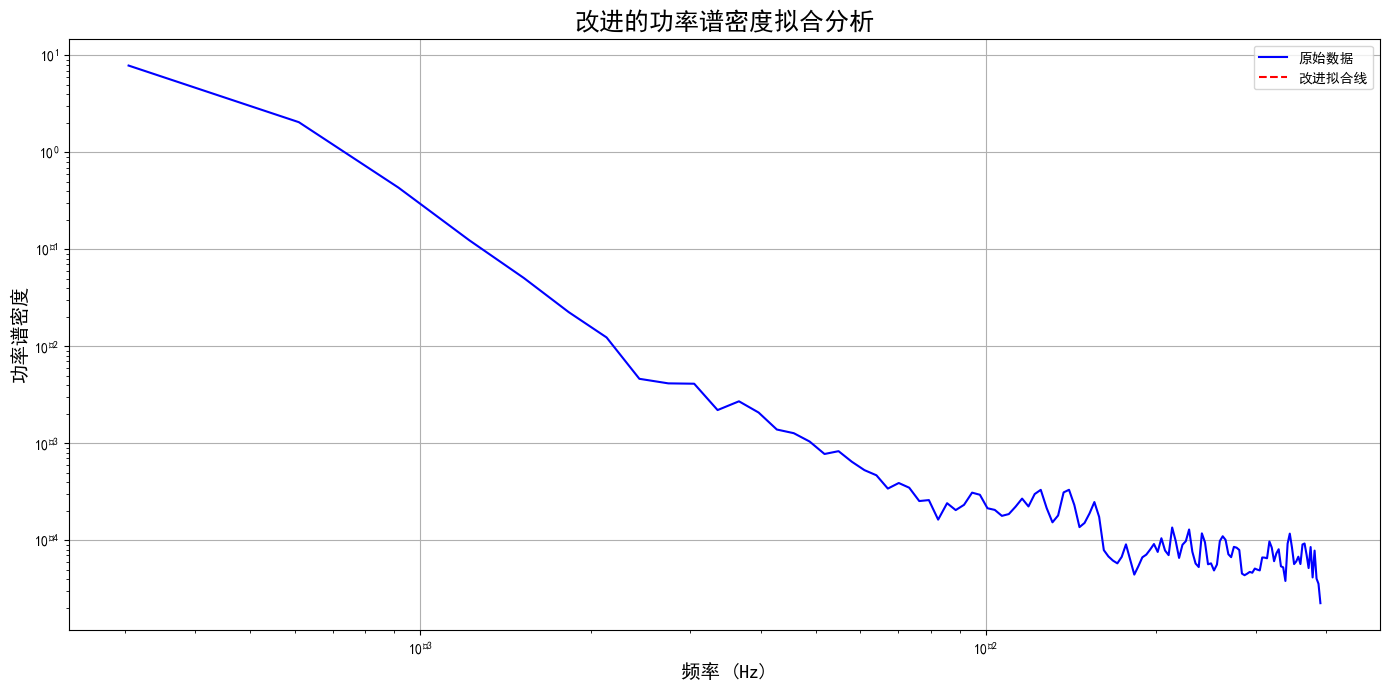

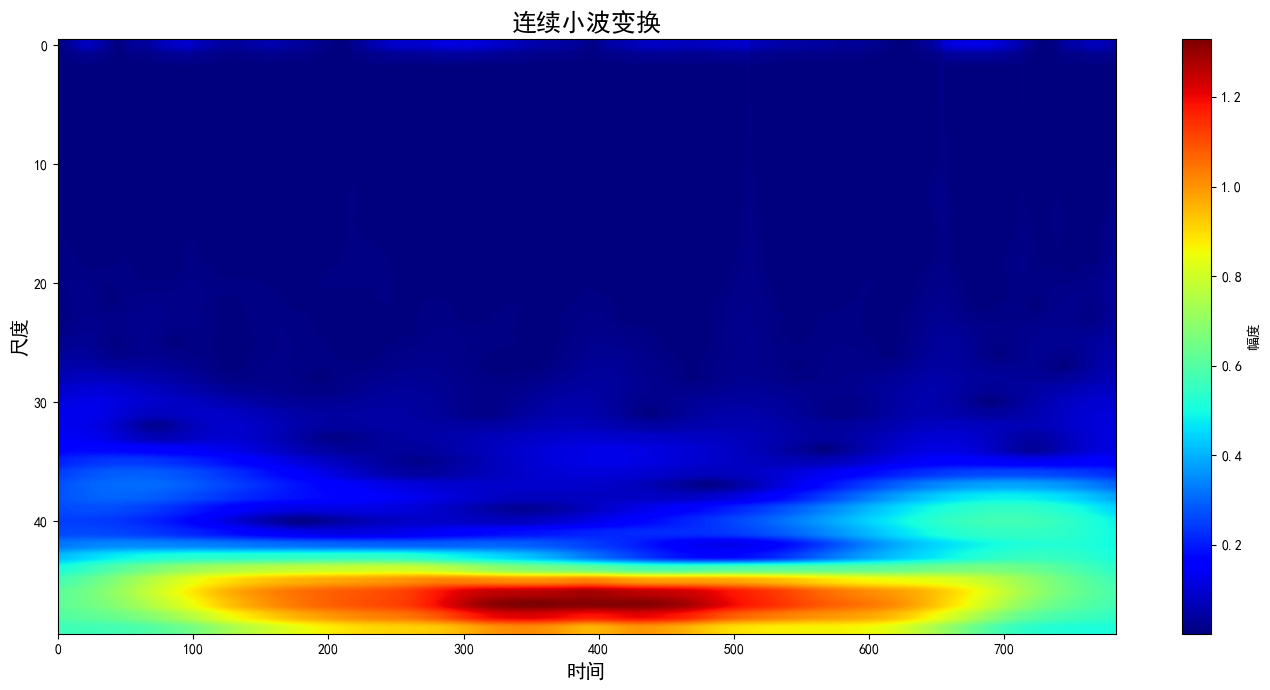

In [4]:

# 4. 红噪声特征分析
def analyze_red_noise(frequencies, psd, thresholds=[1e-6, 1e-5, 1e-4, 1e-3]):
    print("\n红噪声特征分析：")
    for threshold in thresholds:
        low_freq_indices = frequencies < threshold
        low_freq_power = np.sum(psd[low_freq_indices])
        total_power = np.sum(psd)
        ratio = low_freq_power / total_power
        print(f"频率 < {threshold} Hz 的功率占比: {ratio:.4f}")
    
    # 使用给定公式进行功率谱拟合
    def power_spectrum_model(f, P0, fc, q):
        return P0 / ((1 + (f / fc)**2)**(q / 2))
    
    # 对功率谱密度进行拟合
    from scipy.optimize import curve_fit
    valid_indices = frequencies > 0
    popt, _ = curve_fit(power_spectrum_model, frequencies[valid_indices], psd[valid_indices])
    P0, fc, q = popt
    
    print(f"\n拟合参数 P0: {P0:.2e}, fc: {fc:.2e}, q: {q:.2f}")
    
    # 绘制功率谱密度拟合结果
    plt.figure(figsize=(14, 7))
    plt.loglog(frequencies[valid_indices], psd[valid_indices], 'b-', label='原始数据')
    plt.loglog(frequencies[valid_indices], 
               power_spectrum_model(frequencies[valid_indices], *popt), 
               'r--', label='拟合线')
    plt.xlabel('频率 (Hz)', fontsize=14)
    plt.ylabel('功率谱密度', fontsize=14)
    plt.title('功率谱密度拟合分析', fontsize=18, fontweight='bold')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
# 使用修改后的分析函数
analyze_red_noise(frequencies_welch, psd_welch)

# 可选：添加小波分析来检测时变的频率特征
from scipy import signal as signal_processing  # 重命名导入的 signal 模块

# 计算连续小波变换
widths = np.logspace(0, np.log10(len(signal_data)/2), 50)
cwtmatr = signal_processing.cwt(signal_data - mean_signal, signal_processing.morlet2, widths)

plt.figure(figsize=(14, 7))
plt.imshow(np.abs(cwtmatr), aspect='auto', cmap='jet')
plt.colorbar(label='幅度')
plt.ylabel('尺度', fontsize=14)
plt.xlabel('时间', fontsize=14)
plt.title('连续小波变换', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()
